# TIỀN XỬ LÝ DỮ LIỆU

## Thư viện kèm theo


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
data = pd.read_csv("/content/TelcoCustomerChurn.csv")

## Xóa những thuộc tính không ý nghĩa trong quá trình khai thác


In [ ]:
data.columns

Có 7043 đối tượng dữ liệu và 21 thuộc tính



Xóa cột customerID vì đây là dữ liệu không cần thiết để tìm ra tỉ lệ khách hàng hủy đăng ký dịch vụ

In [ ]:
data.drop(['customerID'], axis=1, inplace = True)

In [ ]:
# Tìm dữ liệu bị thiếu
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

## Thuộc tính Gender

**<font color='royalblue'> Thuộc tính Gender: Giới tính của khách hàng (Nam - Male, Nữ - Female)</font>**



Chuyển giá trị của cột Gender từ giá trị Male, Female về giá trị 0 và 1 để phù hợp với đầu vào của thuật toán

In [ ]:
data['gender'].head()

In [ ]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['gender'].value_counts()

## Family (Partner + Dependents)

In [ ]:
#Creating a new column for family. If a customer has dependant or Partner, I am considering it as family .
list_family = []
for rows in range(len(data['Partner'])):
    if ((data['Partner'][rows] == 'No') and (data['Dependents'][rows] == 'No')):
        list_family.append('No')
    else:
        list_family.append('Yes')
data['Family'] = list_family

In [ ]:
# For Partner & Dependant , we created Family Column . Converting Family column to numeric value
data['Family'] = data['Family'].map( {'Yes': 1, 'No': 0} ).astype(int) #Map Categorical to Numerical Values

## Online Service (OnlineSecurity + OnlineBackup)

In [ ]:
#Creating a new column for Online Services (Online Security & Online Backup) . If a customer has Online Security or Online Backup services
#then , I am considering it as "Yes" else "No"
list_online_services = []
for rows_os in range(len(data['OnlineSecurity'])):
    if ((data['OnlineSecurity'][rows_os] == 'No') and (data['OnlineBackup'][rows_os] == 'No')):
        list_online_services.append('No')
    else:
        list_online_services.append('Yes')
data['OnlineServices'] = list_online_services



## Streaming Service (StreamingTV + StreamingMovies)

In [ ]:
#Creating a new column for Streaming Services (StreamingTV & StreamingMovies) . If a customer has StreamingTV or StreamingMovies
#then , I am considering it as "Yes" else "No"
list_streaming_services = []
for rows_stv in range(len(data['StreamingTV'])):
    if ((data['StreamingTV'][rows_stv] == 'No') and (data['StreamingMovies'][rows_stv] == 'No')):
        list_streaming_services.append('No')
    else:
        list_streaming_services.append('Yes')
data['StreamingServices'] = list_streaming_services


## Các thuộc tính khác

In [ ]:
data['OnlineServices'] = data['OnlineServices'].map( {'Yes': 1, 'No': 0} ).astype(int) #Map Categorical to Numerical Values
data['StreamingServices'] = data['StreamingServices'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})


**<font color='royalblue'> Thuộc tính MonthlyCharges: Số tiền khách hàng trả hàng tháng thuê dịch vụ</font>**

In [ ]:
data['MonthlyCharges'].head(12)

**<font color='royalblue'> Thuộc tính TotalCharges: Tổng chi phí khách hàng đã chi trả</font>**


In [ ]:
data['TotalCharges'].head()

In [ ]:
## Có 11 hàng chứa " ", đây là 11 hàng bị thiếu dữ liệu
len(data[data['TotalCharges'] == " "])

In [ ]:
## Xóa các hàng thiếu dữ liệu
data = data[data['TotalCharges'] != " "]

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

**<font color='tomato'>Kết luận</font>**

    Hầu hết khách hàng ngừng sử dụng dịch vụ có tổng chi phí chi trả chưa đến 2000$ 
    Trong khoảng chi phí từ 2500$ đến 8000$, số khách hàng trung thành cao gấp đôi so với khách hàng ngừng sử dụng dịch vụ.

## Rời rạc hóa dữ liệu

<font color='royalblue'>**Rời rạc hóa dữ liệu**

In [ ]:
data['quantile_MonthlyCharges'] = pd.qcut(data['MonthlyCharges'], q = 4)

In [ ]:
data['quantile_MonthlyCharges'].value_counts()

In [ ]:
for data2 in [data]:
  data2['MonthlyCharges'] = data2['MonthlyCharges'].astype(int)
  data2.loc[(data['MonthlyCharges'] > 18.249) & (data2['MonthlyCharges'] <= 35.588), 'MonthlyCharges'] = 1;
  data2.loc[(data['MonthlyCharges'] > 35.588) & (data2['MonthlyCharges'] <= 70.35), 'MonthlyCharges'] = 2;
  data2.loc[(data['MonthlyCharges'] > 70.35) & (data2['MonthlyCharges'] <= 89.862), 'MonthlyCharges'] = 3;
  data2.loc[(data['MonthlyCharges'] > 89.862) & (data2['MonthlyCharges'] <= 118.75), 'MonthlyCharges'] = 4;

In [ ]:
data['MonthlyCharges'].head(12)

In [ ]:
data.head(12)

In [ ]:
data['quantile_TotalCharges'] = pd.qcut(data['TotalCharges'], q = 4)

In [ ]:
data['quantile_TotalCharges'].value_counts().sort_values(ascending=True)

In [ ]:
for data3 in [data]:
  data3['TotalCharges'] = data3['TotalCharges'].astype(int)
  data3.loc[(data['TotalCharges'] > 18.799) & (data3['TotalCharges'] <= 401.45), 'TotalCharges'] = 1;
  data3.loc[(data['TotalCharges'] > 401.45) & (data3['TotalCharges'] <= 1397.475), 'TotalCharges'] = 2;
  data3.loc[(data['TotalCharges'] > 1397.475) & (data3['TotalCharges'] <= 3794.738), 'TotalCharges'] = 3;
  data3.loc[(data['TotalCharges'] > 3794.738) & (data3['TotalCharges'] <= 8684.8), 'TotalCharges'] = 4;

In [ ]:
data['TotalCharges']

In [ ]:
data['quantile_tenure'] = pd.qcut(data['tenure'], q = 4)

In [ ]:
data['quantile_tenure'].value_counts()

In [ ]:
for data4 in [data]:
  data4['tenure'] = data4['tenure'].astype(int)
  data4.loc[(data['tenure'] > 0.999) & (data4['tenure'] <= 9.0), 'tenure'] = 1;
  data4.loc[(data['tenure'] > 9.0) & (data4['tenure'] <= 29.0), 'tenure'] = 2;
  data4.loc[(data['tenure'] > 29.0) & (data4['tenure'] <= 55.0), 'tenure'] = 3;
  data4.loc[(data['tenure'] > 55.0) & (data4['tenure'] <= 72.0), 'tenure'] = 4;

In [ ]:
data['tenure']

In [ ]:
data.drop(['quantile_MonthlyCharges', 'quantile_TotalCharges', 'quantile_tenure'], axis=1, inplace = True)
data

In [ ]:
data.drop(['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies'], axis=1, inplace = True)

In [ ]:
data.head(5)

In [ ]:
data.info()

In [ ]:
data.to_csv('TelcoCustomerChurn_Preprocessed.csv')

# THỰC NGHIỆM

## Nạp thư viện và chuẩn bị dữ liệu

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn import tree 
import pandas as pd 
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from datetime import datetime, timedelta
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TelcoCustomerChurn_Preprocessed.csv to TelcoCustomerChurn_Preprocessed.csv


In [ ]:
#Đọc dữ liệu và xóa cột thừa
data = pd.read_csv('TelcoCustomerChurn_Preprocessed.csv')
data = data.drop(['Unnamed: 0'],axis=1)
data

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Family,OnlineServices,StreamingServices,Churn
0,0,0,1,0,No phone service,DSL,No,No,Month-to-month,1,Electronic check,1,1,1,1,0,No
1,1,0,3,1,No,DSL,Yes,No,One year,0,Mailed check,2,3,0,1,0,No
2,1,0,1,1,No,DSL,No,No,Month-to-month,1,Mailed check,2,1,0,1,0,Yes
3,1,0,3,0,No phone service,DSL,Yes,Yes,One year,0,Bank transfer (automatic),2,3,0,1,0,No
4,0,0,1,1,No,Fiber optic,No,No,Month-to-month,1,Electronic check,3,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,2,1,Yes,DSL,Yes,Yes,One year,1,Mailed check,3,3,1,1,1,No
7028,0,0,4,1,Yes,Fiber optic,Yes,No,One year,1,Credit card (automatic),4,4,1,1,1,No
7029,0,0,2,0,No phone service,DSL,No,No,Month-to-month,1,Electronic check,1,1,1,1,0,No
7030,1,1,1,1,Yes,Fiber optic,No,No,Month-to-month,1,Mailed check,3,1,1,0,0,Yes


In [ ]:
#Tách các thuộc tính và output thành 2 bảng lần lượt là: feature và label
feature = data.drop(['Churn'],axis=1)
label = data['Churn']

In [ ]:
#Chuyển đổi dữ liệu không phải số về dạng số bằng One-hot vector
feature_onehot = pd.get_dummies(feature, columns = feature.select_dtypes(exclude=['int64']).columns)
feature_onehot

,gender,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Family,OnlineServices,StreamingServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,3,1,0,2,3,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
2,1,0,1,1,1,2,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,3,0,0,2,3,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
4,0,0,1,1,1,3,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,2,1,1,3,3,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
7028,0,0,4,1,1,4,4,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0
7029,0,0,2,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7030,1,1,1,1,1,3,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
#Chia dữ liệu thành train và test theo tỉ lệ train:test = 8:2 
X_train,X_test,y_train,y_test = train_test_split(feature_onehot ,label,test_size=0.2,random_state=42)

## Decision Tree

In [ ]:
#Tiến hành train mô hình Decision tree bằng thuật toán CART 
Start_CART = time.time()

#Tạo cây quyết định với CART 
clfcart= tree.DecisionTreeClassifier(criterion ='gini', random_state=0)

#Train cây quyết định với CART 
clfcart_train = clfcart.fit(X_train,y_train)
End_CART = time.time()
tree_predict1 = clfcart_train.predict(X_test)
print('Training size= %d, Model accuracy= %.2f%%'% \
(X_train.shape[0], accuracy_score(y_test,tree_predict1)*100))
#Tính toán thời gian thuật toán chạy 
thoigian1 = timedelta(seconds=round(End_CART - Start_CART,4))
print('Thời gian chạy thuật toán là: ' ,thoigian1)


Training size= 5625, Model accuracy= 73.42%
Thời gian chạy thuật toán là:  0:00:00.021400


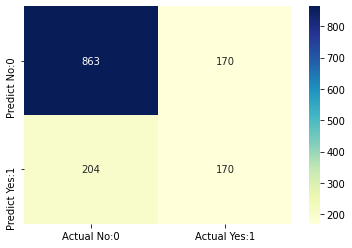

In [ ]:
#Dựng Confuse Matrix
cm = confusion_matrix(y_test, tree_predict1)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual No:0','Actual Yes:1' ], 
                                 index=['Predict No:0','Predict Yes:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0] 
print(TP,TN,FP,FN)

170 863 170 204


In [ ]:

print(classification_report(y_test, tree_predict1))

              precision    recall  f1-score   support

          No       0.81      0.84      0.82      1033
         Yes       0.50      0.45      0.48       374

    accuracy                           0.73      1407
   macro avg       0.65      0.64      0.65      1407
weighted avg       0.73      0.73      0.73      1407



## Random Forest

In [ ]:
start_Random=time.time()
random_forest_ = RandomForestClassifier(100)
random_forest_.fit(X_train, y_train)
end_Random=time.time()
y_pred_rf = random_forest_.predict(X_test)
print('Training size= %d, Model accuracy= %.2f%%'% \
(X_train.shape[0], accuracy_score(y_test,y_pred_rf)*100))
timeofRF=timedelta(seconds=round(end_Random-start_Random,4))
print("Thời gian chạy thuật toán: ",timeofRF)

Training size= 5625, Model accuracy= 75.69%
Thời gian chạy thuật toán:  0:00:00.472500


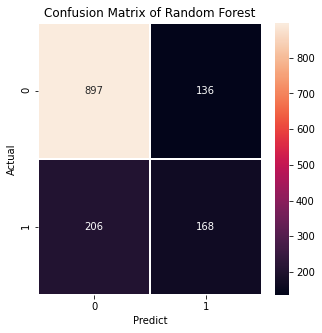

In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_rf, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest")
plt.show()

In [ ]:
TP = cm_rf[1,1]
TN = cm_rf[0,0]
FP = cm_rf[0,1]
FN = cm_rf[1,0] 
print(TP,TN,FP,FN)

168 897 136 206


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.81      0.87      0.84      1033
         Yes       0.55      0.45      0.50       374

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.74      0.76      0.75      1407



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
start_Bayes = time.time()
# Khởi tạo thuật toán
gnb = GaussianNB()
# Training modelling
y_pred_bayes = gnb.fit(X_train,y_train).predict(X_test)
end_Bayes = time.time()
print('Training size= %d, Model accuracy= %.2f%%'% \
(X_train.shape[0], accuracy_score(y_test,y_pred_bayes)*100))
tgian= timedelta(seconds=round(end_Bayes-start_Bayes,4))
print("Thời gian chạy thuật toán:",tgian)

Training size= 5625, Model accuracy= 71.07%
Thời gian chạy thuật toán: 0:00:00.011000


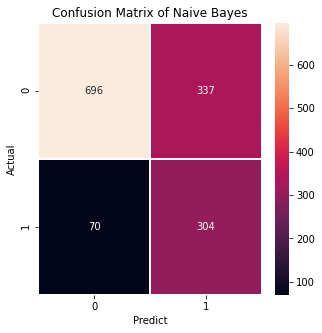

In [ ]:
cm_bayes = confusion_matrix(y_test,y_pred_bayes)

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_bayes, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Naive Bayes")
plt.show()

In [ ]:
TP = cm_bayes[1,1]
TN = cm_bayes[0,0]
FP = cm_bayes[0,1]
FN = cm_bayes[1,0] 
print(TP,TN,FP,FN)

304 696 337 70


In [ ]:
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

          No       0.91      0.67      0.77      1033
         Yes       0.47      0.81      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407



# ĐÁNH GIÁ MÔ HÌNH

# Đo thời gian của 3 thuật toán

Text(0, 0.5, 'Thời gian chạy thuật toán')

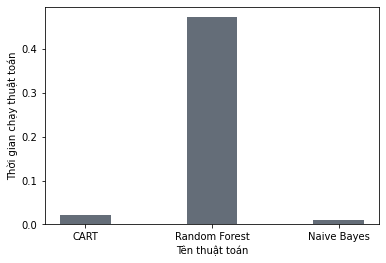

In [ ]:
plt.bar(x = ['CART', 'Random Forest','Naive Bayes' ], height = [End_CART - Start_CART, end_Random - start_Random,end_Bayes - start_Bayes], width = 0.4, color = '#646D78')
plt.xlabel('Tên thuật toán')
plt.ylabel('Thời gian chạy thuật toán')

# Đo độ chính xác của 3 thuật toán

Text(0, 0.5, 'Độ chính xác Accuracy')

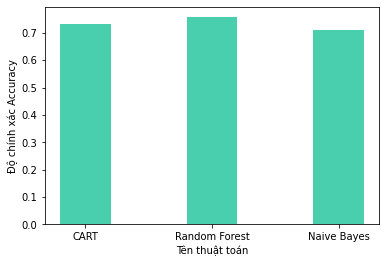

In [ ]:
plt.bar(x = ['CART', 'Random Forest','Naive Bayes'], height = [accuracy_score(y_test,tree_predict1), accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_bayes),], width = 0.4, color = '#49CFAE')
plt.xlabel('Tên thuật toán')
plt.ylabel('Độ chính xác Accuracy')

# Đo F1 Score của 3 thuật toán

Text(0, 0.5, 'F1 Score')

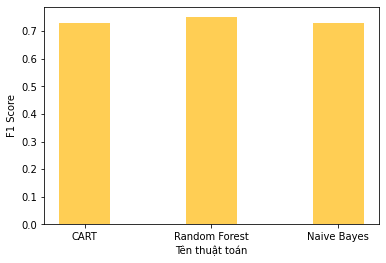

In [ ]:
plt.bar(x = ['CART','Random Forest','Naive Bayes'], height = [0.73, 0.75, 0.73], width = 0.4, color = '#FFCE54')
plt.xlabel('Tên thuật toán')
plt.ylabel('F1 Score')

# Dự đoán kết quả bằng Random Forest

In [ ]:
X_new=[[0,0,3,0,1,2,3,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0]]
y_new = random_forest_.predict(X_new)
print(y_new)

['Yes']
